In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [2]:

df = pd.read_csv('F:\\Demand Radar\\Developments\\5. Code - Check\\radar-master\\data\\azure\\modelling\\france_vodka_standard_sample_lstm.csv')
df.fillna(0,inplace=True)
print(df.head()) #7 columns, including the Date. 


        month    volume  Stringency  Closure
0  2017-01-01  19980.04         0.0      0.0
1  2017-02-01  24038.14         0.0      0.0
2  2017-03-01  25712.52         0.0      0.0
3  2017-04-01  22221.04         0.0      0.0
4  2017-05-01  27477.87         0.0      0.0


In [3]:

#Separate dates for future plotting
train_dates = pd.to_datetime(df['month'])
print(train_dates.tail(15)) #Check last few dates. 

43   2020-08-01
44   2020-09-01
45   2020-10-01
46   2020-11-01
47   2020-12-01
48   2021-01-01
49   2021-02-01
50   2021-03-01
51   2021-04-01
52   2021-05-01
53   2021-06-01
54   2021-07-01
55   2021-08-01
56   2021-09-01
57   2021-10-01
Name: month, dtype: datetime64[ns]


In [4]:
#Variables for training
cols = list(df)[1:4]
print(cols) 
df_for_training = df[cols].astype(float)

['volume', 'Stringency', 'Closure']


In [5]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [6]:

#New dataframe with only training data - 5 columns
df_for_training = df[cols].astype(float)

In [7]:

#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
#In this example, the n_features is 3. We will make timesteps = 14 (past days data used for training). 

#Empty lists to be populated using formatted training data
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 3  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (55, 3, 3).
trainY shape == (55, 1).


In [17]:

model = Sequential()
model.add(LSTM(8, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(4, activation='relu', return_sequences=False))
model.add(Dropout(0.25))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mape')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 8)              384       
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 597
Trainable params: 597
Non-trainable params: 0
_________________________________________________________________


In [18]:

# fit the model
history = model.fit(trainX, trainY, epochs=500, batch_size=8, validation_split=0.1, verbose=1)


Epoch 1/500
7/7 [==============================] - 0s 36ms/step - loss: 114.9584 - val_loss: 84.6697
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 107.8935 - val_loss: 85.7930
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 96.7476 - val_loss: 86.0826
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 123.5588 - val_loss: 87.3181
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 101.1065 - val_loss: 87.7919
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 102.1388 - val_loss: 88.0374
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 108.4324 - val_loss: 89.9750
Epoch 8/500
7/7 [==============================] - 0s 7ms/step - loss: 115.5926 - val_loss: 91.5424
Epoch 9/500
7/7 [==============================] - 0s 7ms/step - loss: 90.1049 - val_loss: 93.6331
Epoch 10/500
7/7 [==============================] - 0s 7ms/step - loss: 97.5240 - val_loss: 94.3601
E

7/7 [==============================] - 0s 7ms/step - loss: 88.9834 - val_loss: 91.0720
Epoch 83/500
7/7 [==============================] - 0s 4ms/step - loss: 87.9273 - val_loss: 91.4835
Epoch 84/500
7/7 [==============================] - 0s 4ms/step - loss: 84.5786 - val_loss: 91.2204
Epoch 85/500
7/7 [==============================] - 0s 4ms/step - loss: 83.2602 - val_loss: 90.2265
Epoch 86/500
7/7 [==============================] - 0s 4ms/step - loss: 90.9935 - val_loss: 89.5007
Epoch 87/500
7/7 [==============================] - 0s 4ms/step - loss: 84.0835 - val_loss: 88.8428
Epoch 88/500
7/7 [==============================] - 0s 7ms/step - loss: 88.2217 - val_loss: 88.7166
Epoch 89/500
7/7 [==============================] - 0s 7ms/step - loss: 88.7270 - val_loss: 88.4685
Epoch 90/500
7/7 [==============================] - 0s 7ms/step - loss: 85.3709 - val_loss: 88.7090
Epoch 91/500
7/7 [==============================] - 0s 7ms/step - loss: 90.0742 - val_loss: 88.9287
Epoch 92/500


7/7 [==============================] - 0s 7ms/step - loss: 84.1247 - val_loss: 82.5600
Epoch 164/500
7/7 [==============================] - 0s 7ms/step - loss: 84.6400 - val_loss: 82.2818
Epoch 165/500
7/7 [==============================] - 0s 9ms/step - loss: 87.7831 - val_loss: 82.6164
Epoch 166/500
7/7 [==============================] - 0s 7ms/step - loss: 81.6846 - val_loss: 83.2561
Epoch 167/500
7/7 [==============================] - 0s 7ms/step - loss: 83.9556 - val_loss: 87.0786
Epoch 168/500
7/7 [==============================] - 0s 7ms/step - loss: 80.0256 - val_loss: 87.5396
Epoch 169/500
7/7 [==============================] - 0s 7ms/step - loss: 81.1681 - val_loss: 85.2979
Epoch 170/500
7/7 [==============================] - 0s 7ms/step - loss: 84.6947 - val_loss: 82.2395
Epoch 171/500
7/7 [==============================] - 0s 7ms/step - loss: 80.5450 - val_loss: 81.8648
Epoch 172/500
7/7 [==============================] - 0s 7ms/step - loss: 82.7892 - val_loss: 84.6338
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 79.8992 - val_loss: 78.2531
Epoch 245/500
7/7 [==============================] - 0s 7ms/step - loss: 80.7319 - val_loss: 81.9619
Epoch 246/500
7/7 [==============================] - 0s 7ms/step - loss: 81.4458 - val_loss: 83.3236
Epoch 247/500
7/7 [==============================] - 0s 9ms/step - loss: 83.6224 - val_loss: 83.6482
Epoch 248/500
7/7 [==============================] - 0s 7ms/step - loss: 79.8826 - val_loss: 83.2525
Epoch 249/500
7/7 [==============================] - 0s 4ms/step - loss: 78.0845 - val_loss: 83.9791
Epoch 250/500
7/7 [==============================] - 0s 4ms/step - loss: 77.1491 - val_loss: 86.0989
Epoch 251/500
7/7 [==============================] - 0s 7ms/step - loss: 82.2436 - val_loss: 82.4181
Epoch 252/500
7/7 [==============================] - 0s 7ms/step - loss: 81.2685 - val_loss: 79.0899
Epoch 253/500
7/7 [==============================] - 0s 7ms/step - loss: 83.3386 - val_loss: 77.7856
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 77.9772 - val_loss: 77.2615
Epoch 326/500
7/7 [==============================] - 0s 7ms/step - loss: 82.5781 - val_loss: 75.6445
Epoch 327/500
7/7 [==============================] - 0s 7ms/step - loss: 81.8370 - val_loss: 76.8637
Epoch 328/500
7/7 [==============================] - 0s 4ms/step - loss: 77.6671 - val_loss: 78.5177
Epoch 329/500
7/7 [==============================] - 0s 4ms/step - loss: 79.1100 - val_loss: 79.0627
Epoch 330/500
7/7 [==============================] - 0s 4ms/step - loss: 81.4675 - val_loss: 79.2480
Epoch 331/500
7/7 [==============================] - 0s 4ms/step - loss: 79.7035 - val_loss: 80.0148
Epoch 332/500
7/7 [==============================] - 0s 4ms/step - loss: 82.0096 - val_loss: 79.4957
Epoch 333/500
7/7 [==============================] - 0s 7ms/step - loss: 76.4376 - val_loss: 77.7653
Epoch 334/500
7/7 [==============================] - 0s 7ms/step - loss: 79.2504 - val_loss: 77.9677
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 80.0289 - val_loss: 77.2859
Epoch 407/500
7/7 [==============================] - 0s 7ms/step - loss: 78.3191 - val_loss: 81.4029
Epoch 408/500
7/7 [==============================] - 0s 7ms/step - loss: 73.6077 - val_loss: 81.4548
Epoch 409/500
7/7 [==============================] - 0s 7ms/step - loss: 84.1968 - val_loss: 76.9783
Epoch 410/500
7/7 [==============================] - 0s 7ms/step - loss: 77.5932 - val_loss: 74.3045
Epoch 411/500
7/7 [==============================] - 0s 7ms/step - loss: 76.2030 - val_loss: 73.3610
Epoch 412/500
7/7 [==============================] - 0s 7ms/step - loss: 77.4143 - val_loss: 74.7558
Epoch 413/500
7/7 [==============================] - 0s 7ms/step - loss: 79.6453 - val_loss: 75.5226
Epoch 414/500
7/7 [==============================] - 0s 7ms/step - loss: 76.8450 - val_loss: 77.3997
Epoch 415/500
7/7 [==============================] - 0s 4ms/step - loss: 80.6248 - val_loss: 78.7240
Epoc

7/7 [==============================] - 0s 7ms/step - loss: 75.3945 - val_loss: 80.2722
Epoch 488/500
7/7 [==============================] - 0s 7ms/step - loss: 83.8546 - val_loss: 82.2346
Epoch 489/500
7/7 [==============================] - 0s 9ms/step - loss: 72.2113 - val_loss: 81.4595
Epoch 490/500
7/7 [==============================] - 0s 7ms/step - loss: 75.4667 - val_loss: 81.0729
Epoch 491/500
7/7 [==============================] - 0s 7ms/step - loss: 76.4500 - val_loss: 81.8080
Epoch 492/500
7/7 [==============================] - 0s 7ms/step - loss: 77.0047 - val_loss: 78.3223
Epoch 493/500
7/7 [==============================] - 0s 7ms/step - loss: 72.1483 - val_loss: 74.4875
Epoch 494/500
7/7 [==============================] - 0s 7ms/step - loss: 80.4094 - val_loss: 75.1805
Epoch 495/500
7/7 [==============================] - 0s 7ms/step - loss: 75.2704 - val_loss: 79.2791
Epoch 496/500
7/7 [==============================] - 0s 7ms/step - loss: 78.7094 - val_loss: 81.6828
Epoc

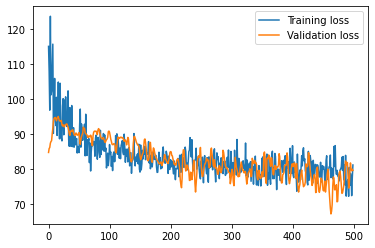

In [19]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [20]:
#Remember that we can only predict one day in future as our model needs 3 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 1
n_days_for_prediction=20  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='MS').tolist()
print(predict_period_dates)

[Timestamp('2021-10-01 00:00:00', freq='MS'), Timestamp('2021-11-01 00:00:00', freq='MS'), Timestamp('2021-12-01 00:00:00', freq='MS'), Timestamp('2022-01-01 00:00:00', freq='MS'), Timestamp('2022-02-01 00:00:00', freq='MS'), Timestamp('2022-03-01 00:00:00', freq='MS'), Timestamp('2022-04-01 00:00:00', freq='MS'), Timestamp('2022-05-01 00:00:00', freq='MS'), Timestamp('2022-06-01 00:00:00', freq='MS'), Timestamp('2022-07-01 00:00:00', freq='MS'), Timestamp('2022-08-01 00:00:00', freq='MS'), Timestamp('2022-09-01 00:00:00', freq='MS'), Timestamp('2022-10-01 00:00:00', freq='MS'), Timestamp('2022-11-01 00:00:00', freq='MS'), Timestamp('2022-12-01 00:00:00', freq='MS'), Timestamp('2023-01-01 00:00:00', freq='MS'), Timestamp('2023-02-01 00:00:00', freq='MS'), Timestamp('2023-03-01 00:00:00', freq='MS'), Timestamp('2023-04-01 00:00:00', freq='MS'), Timestamp('2023-05-01 00:00:00', freq='MS')]


In [21]:


#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


In [22]:


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'month':np.array(forecast_dates), 'volume':y_pred_future})
df_forecast['month']=pd.to_datetime(df_forecast['month'])
df_forecast['month']=pd.to_datetime(df_forecast['month'])

original = df[['month', 'volume']]
original['month']=pd.to_datetime(original['month'])


sns.lineplot(original['month'], original['volume'])
sns.lineplot(df_forecast['month'], df_forecast['volume'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywo

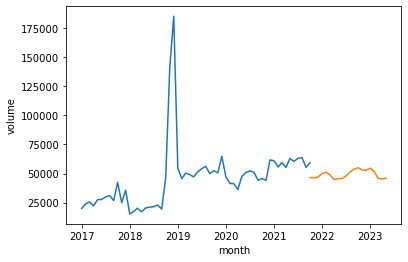

In [23]:
plt.show()


In [24]:
df_forecast

,month,volume
0,2021-10-01,46500.734375
1,2021-11-01,46143.539062
2,2021-12-01,47071.714844
3,2022-01-01,49941.546875
4,2022-02-01,51051.003906
5,2022-03-01,48867.039062
6,2022-04-01,44820.355469
7,2022-05-01,45601.824219
8,2022-06-01,45601.824219
9,2022-07-01,47863.132812


In [16]:
df

,month,volume,Stringency,Closure
0,2017-01-01,19980.04,0.000000,0.00
1,2017-02-01,24038.14,0.000000,0.00
2,2017-03-01,25712.52,0.000000,0.00
3,2017-04-01,22221.04,0.000000,0.00
4,2017-05-01,27477.87,0.000000,0.00
5,2017-06-01,27756.12,0.000000,0.00
6,2017-07-01,29915.21,0.000000,0.00
7,2017-08-01,31135.35,0.000000,0.00
8,2017-09-01,26763.97,0.000000,0.00
9,2017-10-01,42296.05,0.000000,0.00
